In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams.update({
    'figure.figsize': (10, 6),  # Размер фигуры по умолчанию
    'figure.facecolor': '#f5f5f5',  # Цвет фона фигуры (светло-серый)
    'axes.facecolor': '#eaeaf2',  # Цвет фона осей (немного темнее)
    'axes.grid': True,  # Включение сетки
    'grid.color': '#c4c4c4',  # Цвет сетки (светло-серый)
    'grid.linestyle': '--',  # Стиль сетки (пунктирная линия)
    'grid.linewidth': 0.5,  # Толщина линий сетки
    'axes.edgecolor': '#333333',  # Цвет рамки осей (темно-серый)
    'axes.labelcolor': '#333333',  # Цвет подписей осей
    'text.color': '#333333',  # Цвет текста
    'xtick.color': '#333333',  # Цвет меток по оси X
    'ytick.color': '#333333',  # Цвет меток по оси Y
    'font.size': 10,  # Размер шрифта по умолчанию
    'axes.titlesize': 10,  # Размер заголовков графиков
    'axes.labelsize': 9,  # Размер подписей осей
    'xtick.labelsize': 8,  # Размер меток по оси X
    'ytick.labelsize': 8,   # Размер меток по оси Y
    'legend.fontsize': 8,  # Размер шрифта легенды
    'lines.linewidth': 1,  # Толщина линий графиков
    'lines.markersize': 4,  # Размер маркеров
    'axes.prop_cycle': plt.cycler(color=[
        '#4C72B0', '#DD8452', '#55A868', '#C44E52', '#8172B3', '#937860'
    ])  # Красивое сочетание цветов для графиков
})

### Первичный анализ данных

In [42]:
path = r'C:\Users\sa_alyoshin\Desktop\learning\stepik_ml_course\notebooks\DATA\Telco-Customer-Churn.csv'
data = pd.read_csv(path)

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [44]:
num_cols = data.select_dtypes(include=['float', 'int']).columns.to_list()
cat_cols = data.select_dtypes(exclude=['float', 'int']).columns.to_list()
target_col = 'Churn'

In [45]:
data[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


Видно, что SeniorCitizen - категориальный признак. Нужно перегруппировать списки num_cols и cat_cols, чтобы это учесть

In [49]:
data['SeniorCitizen'] = data['SeniorCitizen'].astype('str')

num_cols = data.select_dtypes(include=['float', 'int']).columns.to_list()
cat_cols = data.select_dtypes(exclude=['float', 'int']).columns.to_list()

In [50]:
data[cat_cols].describe().T.assign(share=lambda x: round(x['freq']/x['count'],2))

,count,unique,top,freq,share
customerID,7032,7032,7590-VHVEG,1,0.000142
gender,7032,2,Male,3549,0.504693
SeniorCitizen,7032,2,0,5890,0.8376
Partner,7032,2,No,3639,0.517491
Dependents,7032,2,No,4933,0.701507
PhoneService,7032,2,Yes,6352,0.903299
MultipleLines,7032,3,No,3385,0.481371
InternetService,7032,3,Fiber optic,3096,0.440273
OnlineSecurity,7032,3,No,3497,0.497298
OnlineBackup,7032,3,No,3087,0.438993


#### Анализ числовых данных

Pairplots: распределения числовых переменных и перекрестные scatterplots:  
Можно заметить, что MonthlyCharges равномерно распределени для всего диапазона tenure;  
Распределения числовых переменных имеют сильные перекосы. В случае tenure, MonthlyCharges - бимодальные.
С ростом tenure окно значений TotalCharges увеличивается, что может зависеть от количества дополнительных услуг, которые пользователи при одинаковых tenure закупают от оператора

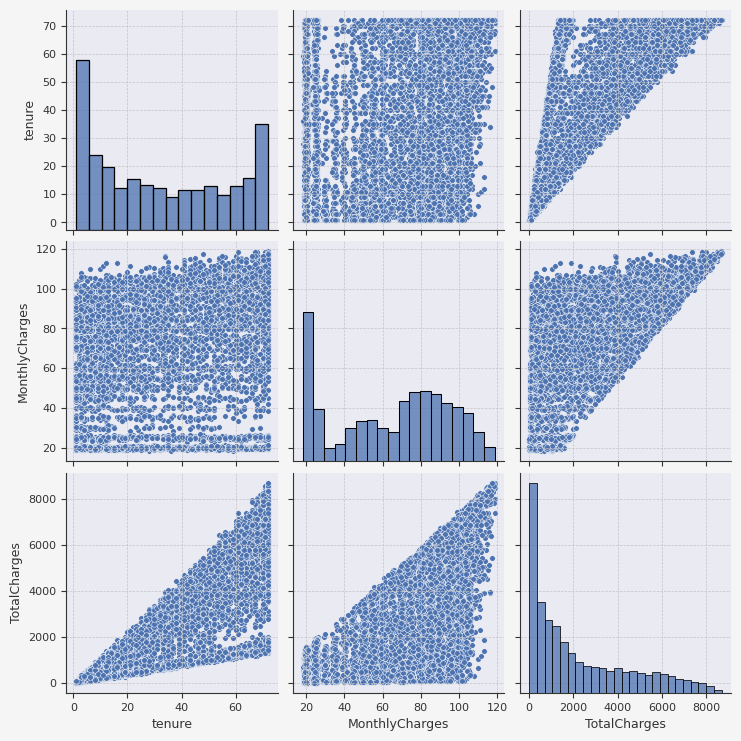

In [61]:
sns.pairplot(data[num_cols], kind='scatter', diag_kind='hist')

Построим наложенные друг на друга гистограммы признаков отфильтрованных по таргету

In [54]:
def create_histograms_for_numeric_columns(data, numeric_columns):
    for col in numeric_columns:
        plt.subplots(figsize=(7,3))
        plt.hist(x=data[data[target_col] == 'No'][col], bins = 70, label=f'{col}, churn: No', alpha=0.7)
        plt.hist(x=data[data[target_col] == 'Yes'][col], bins = 70, label=f'{col}, churn: Yes', alpha=0.7)
        plt.legend()
        plt.show()

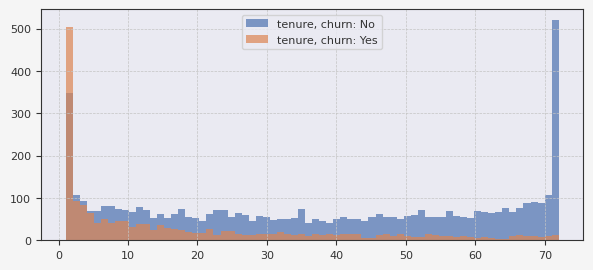

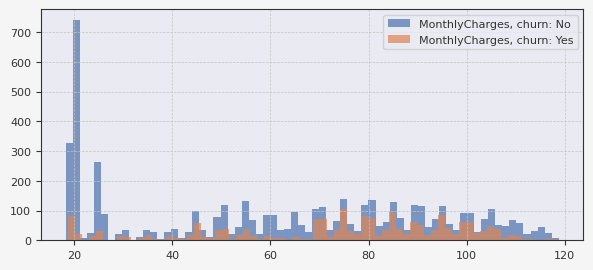

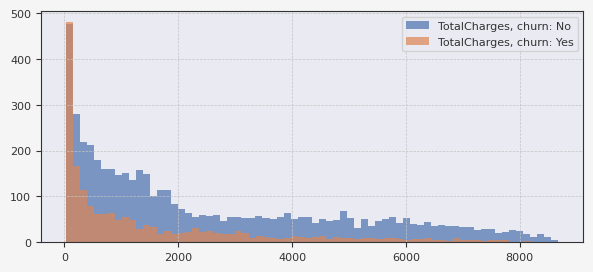

In [55]:
create_histograms_for_numeric_columns(data, num_cols)

Видим, что Churn самый высокий для небольших tenure (то есть, если пользователь уходит, то вначале);  
Со временем, показатель снижается до небольших значений. Визуально, чем больше tenure, тем более пльзователь лоялен;  
Наибольшая доля утекающих пользователей в диапазоне от 70 до 110 по MonthlyCharges

Проверим корреляционную матрицу

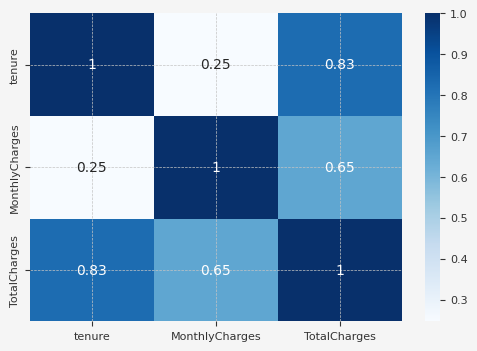

In [73]:
plt.figure(figsize=(6,4))
sns.heatmap(data[num_cols].corr(method='pearson'), cmap='Blues', annot=True)
plt.show()

Ожидаемо, Tenure <> TotalCharges сильно скоррелированы (> 0.83), MonthlyCharges <> Total Charges - допустимо (< 0.7)

Violinplots: как правило, очень информативны в плане распределения

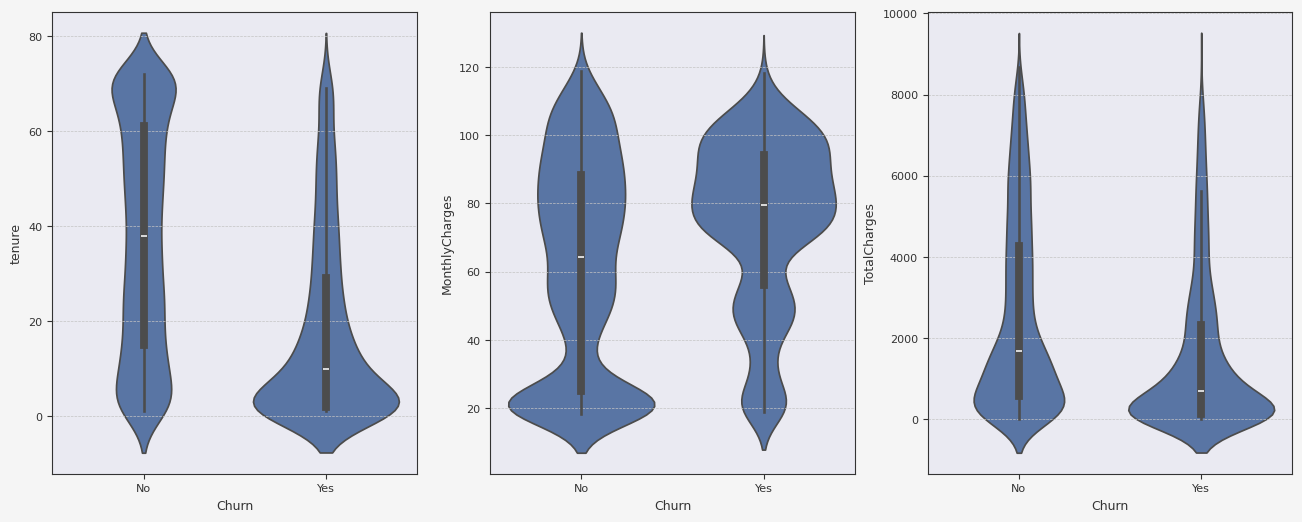

In [86]:
fig, ax = plt.subplots(nrows=1, ncols=len(num_cols), figsize=(16,6))
ax = ax.flatten()
for ix, numeric_col in enumerate(num_cols):
    sns.violinplot(data=data, x=target_col, y=numeric_col, ax=ax[ix])
plt.show()

#### Анализ категориальных данных

In [ ]:
data[cat_cols].describe().T

,count,unique,top,freq
customerID,7032,7032,7590-VHVEG,1
gender,7032,2,Male,3549
SeniorCitizen,7032,2,0,5890
Partner,7032,2,No,3639
Dependents,7032,2,No,4933
PhoneService,7032,2,Yes,6352
MultipleLines,7032,3,No,3385
InternetService,7032,3,Fiber optic,3096
OnlineSecurity,7032,3,No,3497
OnlineBackup,7032,3,No,3087


Barplots groupby categorical, target: сможем увидеть информацию по тому, для каких категорий churn выше всего

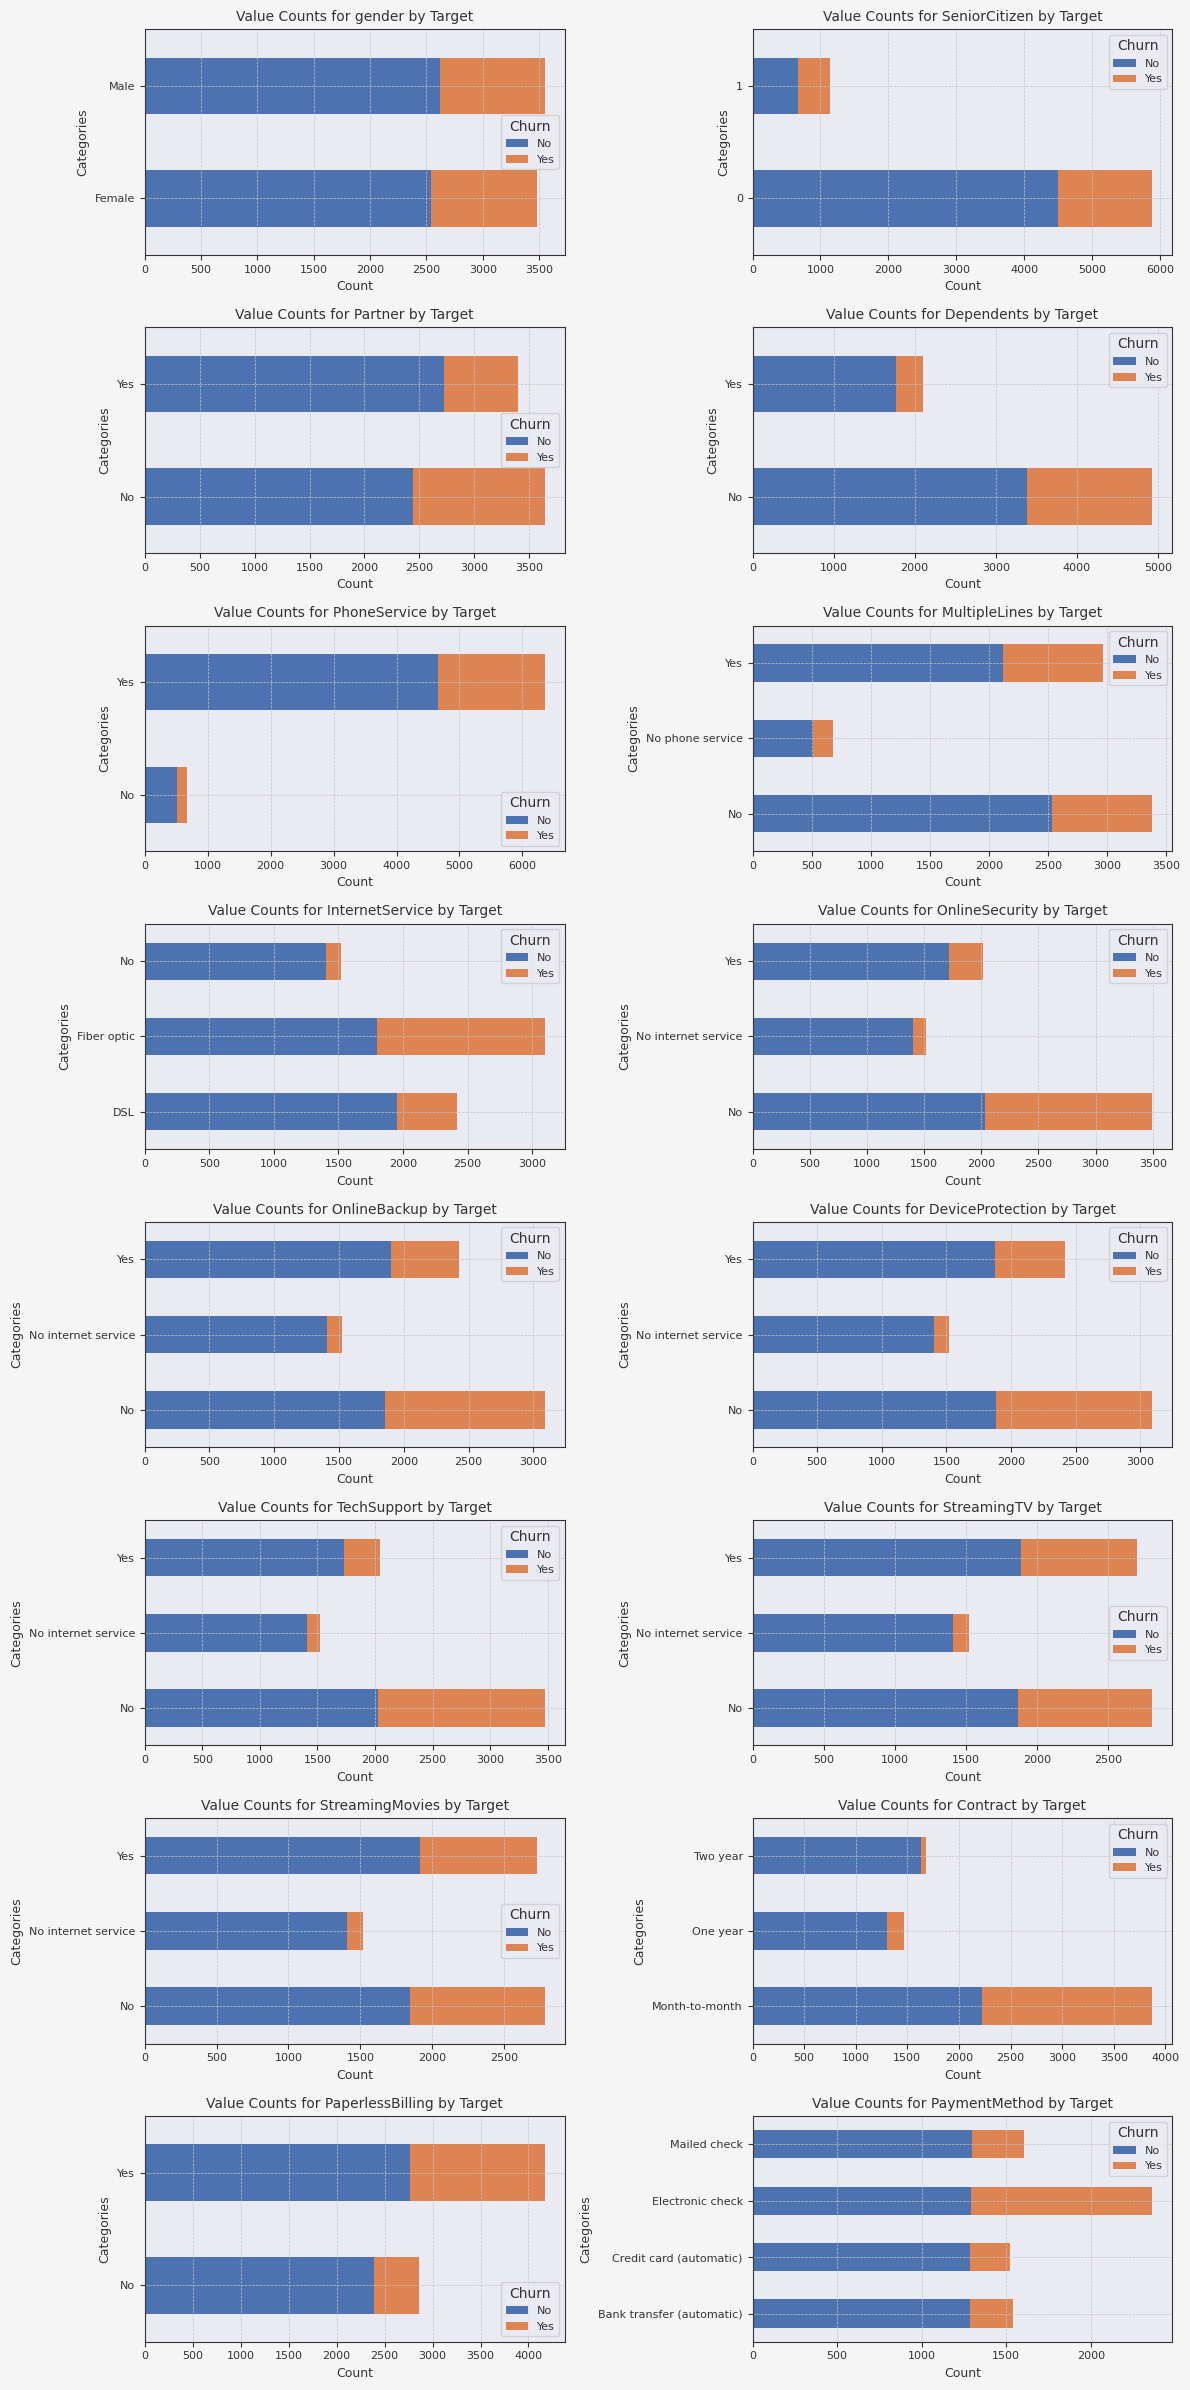

In [ ]:
cat_cols_subset = cat_cols[1:-1]

n_plots = len(cat_cols_subset)
nrows = n_plots // 2 + n_plots % 2 
ncols = 2 
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 3 * nrows))
ax = ax.flatten()

for i, col in enumerate(cat_cols_subset):
    grouped = data.groupby([col, target_col]).size().unstack(fill_value=0)
    
    grouped.plot.barh(stacked=True, ax=ax[i])
    ax[i].set_title(f'Value Counts for {col} by Target')
    ax[i].set_xlabel('Count')
    ax[i].set_ylabel('Categories')

for j in range(i + 1, len(ax)):
    ax[j].set_visible(False)

plt.tight_layout()
plt.show()


Заметки по граифкам (визуальные, не строгие):  
- Gender: схожее процентное соотношение churn по полам
- SeniorCitizen: на первый взгляд, процентное соотношение схожее, возможно seniorCitizen немного чаще уходят  
- Partner: No Partner уходят чаще  
- Dependants: No Dependants уходят чаще
- Phone Service: Визуально пропорция одинаковая (очевидно, что phone service - основная услуга для клиентов)
- Multiple Lines: примерно похожи  
- Internet Service: сильно чаще уходят:  
-- пользователи FiberOptic, без Online Security, без Online Backup, без DeviceProtection, и без Tech Support  
- StreamingTV, StreamingMovies: схожее соотношение chunk  
- Contract, PaperlessBilling, PaymentMethod:  
-- чаще уходят те, кому это интуитивно легче сделать: на помесячных контрактах, с paperlessbilling, с electronic check.

Хочу увидеть количество chunk = 'Yes' в процентном соотношении от всех chunk для каждой категории

In [ ]:
def create_summary_table(data, cat_cols_subset, target_col):
    df = data.copy()
    summary_table = []

    for channel in cat_cols_subset:
        grouped = df.rename(columns={channel: 'Sub_Categories'}).groupby(['Sub_Categories', target_col]).size().unstack(fill_value=0)
        
        grouped['Total'] = grouped.sum(axis=1)

        grouped_percent = round(grouped.div(grouped['Total'], axis=0) * 100, 2)
        grouped_percent = grouped_percent.add_suffix(' (%)')
        
        result = pd.concat([grouped, grouped_percent], axis=1)
        
        result = result.reset_index()
        result.insert(0, 'Channel_Type', channel)
        summary_table.append(result)

    summary_table = pd.concat(summary_table, ignore_index=True)
    summary_table['Yes_to_total_yes (%)'] = round(summary_table['Yes'] / summary_table['Yes'].sum(axis=0) * 100, 2)
    summary_table.sort_values(by='Yes_to_total_yes (%)', ascending=False, inplace=True)
    summary_table.reset_index(drop=True, inplace=True)
    summary_table.columns.name = None

    return summary_table

In [200]:
create_summary_table(data=data, cat_cols_subset=cat_cols_subset, target_col=target_col)

,Channel_Type,Sub_Categories,No,Yes,Total,No (%),Yes (%),Total (%),Yes_to_total_yes (%)
0,PhoneService,Yes,4653,1699,6352,73.25,26.75,100.0,5.68
1,Contract,Month-to-month,2220,1655,3875,57.29,42.71,100.0,5.53
2,Dependents,No,3390,1543,4933,68.72,31.28,100.0,5.16
3,OnlineSecurity,No,2036,1461,3497,58.22,41.78,100.0,4.89
4,TechSupport,No,2026,1446,3472,58.35,41.65,100.0,4.84
5,PaperlessBilling,Yes,2768,1400,4168,66.41,33.59,100.0,4.68
6,SeniorCitizen,0,4497,1393,5890,76.35,23.65,100.0,4.66
7,InternetService,Fiber optic,1799,1297,3096,58.11,41.89,100.0,4.34
8,OnlineBackup,No,1854,1233,3087,60.06,39.94,100.0,4.12
9,DeviceProtection,No,1883,1211,3094,60.86,39.14,100.0,4.05


Хочу посмотреть кросс-пересечения для нескольких категориальных признаков, чтобы посмотреть, возможно, есть какие-то случаи, где уход пользователей доминирует

In [239]:
from itertools import combinations

def features_combinator(data, features, target_col, max_combination_length=5):
    df = data.copy()
    len_features = len(features)
    results_list = []

    for i in range(3, min(len_features, max_combination_length) + 1):
        combinations_of_feats = combinations(features, i)
        combinations_list = [list(combination) for combination in combinations_of_feats]

        for combination in combinations_list:
            grouped = df.groupby(by=combination)[target_col].value_counts().unstack(fill_value=0).reset_index()
            
            grouped['chunk_rate'] = grouped['Yes'] / (grouped['Yes'] + grouped['No'])
            
            results_list.append(grouped)

    result = pd.concat(results_list, ignore_index=True)
    result.sort_values(by=['Yes','chunk_rate'], ascending=False, inplace=True)

    return result

In [240]:
combs = features_combinator(
    data=data,
    features=cat_cols_subset,
    target_col=target_col,
    max_combination_length=4
)

Для удобства, сгруппируем результаты на произвольные интервалы

In [253]:
def groupings(data):
    df = data.copy()

    df['Yes_range'] = pd.cut(df['Yes'], bins=np.arange(0, df['Yes'].max() + 500, 500), right=False)
    df['chunk_rate_range'] = pd.cut(df['chunk_rate'], bins=np.arange(0, 1.1, 0.1), right=False)

    grouped = (
        df.groupby(['Yes_range', 'chunk_rate_range'])
        .size()
        .unstack(fill_value=0)
    )
    return grouped

In [254]:
groupings(data=combs)

C:\Users\sa_alyoshin\AppData\Local\Temp\ipykernel_16164\2075119367.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['Yes_range', 'chunk_rate_range'])


chunk_rate_range,"[0.0, 0.1)","[0.1, 0.2)","[0.2, 0.3)","[0.3, 0.4)","[0.4, 0.5)","[0.5, 0.6)","[0.6, 0.7)","[0.7, 0.8)","[0.8, 0.9)","[0.9, 1.0)"
Yes_range,,,,,,,,,,
"[0, 500)",18881,14828,10588,7813,5333,2776,280,7,4,0
"[500, 1000)",0,0,14,86,508,538,62,0,0,0
"[1000, 1500)",0,0,0,3,14,22,0,0,0,0


-22 случая, когда в срезе более 1000 уходов и это количество составляет 0.5-0.6 от всего количества человек в срезе  
-62 случай, когда в срезе более 500 и менее 1000 уходов, а метрика уже в районе 0.6-0.7  

В таком духе следует далее углубляться, чтобы увидеть срезы. Допустим, мне интересно посмотреть на те случаи, когда уходов более 1000 и chunkrate максимальный

In [263]:
slice1 = combs[(combs['Yes'] >= 1000) & (combs['chunk_rate'] == combs[(combs['Yes'] >= 1000) & (combs['chunk_rate'] >= 0.5)]['chunk_rate'].max())]

In [282]:
slice1.dropna(how='all', axis=1)

Churn,No,Yes,chunk_rate,PhoneService,InternetService,OnlineSecurity,Contract,Characteristics
6051,743,1031,0.581172,NaN,Fiber optic,No,Month-to-month,"[Fiber optic, No, Month-to-month]"
47224,743,1031,0.581172,Yes,Fiber optic,No,Month-to-month,"[Yes, Fiber optic, No, Month-to-month]"


Можно создать некоторое количество таких слайсов, пометить как участников как группу риска и поместить в пулл с дополнительными активностями по удержанию или же по улучшению условий. Важно, чтобы труд стоил средств, поэтому предварительно можно придумать метрику, которая будет составлять ожидаемую потерю средств от данной группы. Если эта сумма выше допустимого порога, то берем в усиленную проработку. Что-то в таком роде.